In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Background
This competition is designed to help you get started with DataCamp Competitions and familiarize yourself with how competitions work. You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area. You’ve recently learned data manipulation and plotting, and are helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## Your challenge
Create a report to answer your colleague's questions. Include:

What are the total sales for each payment method?
What is the average unit price for each product line?
Create plots to visualize findings for questions 1 and 2.
[Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
Summarize your findings.

## Loading Data

In [7]:
data=pd.read_csv('sales_data.csv',parse_dates=['date'])
data

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash


## Data Description

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


## Exploratory data analysis

###### what is the average unit of price for the product line

In [23]:
price_productline=data.groupby('product_line')[['unit_price']].mean()
price_productline

,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


<AxesSubplot:xlabel='product_line', ylabel='unit_price'>

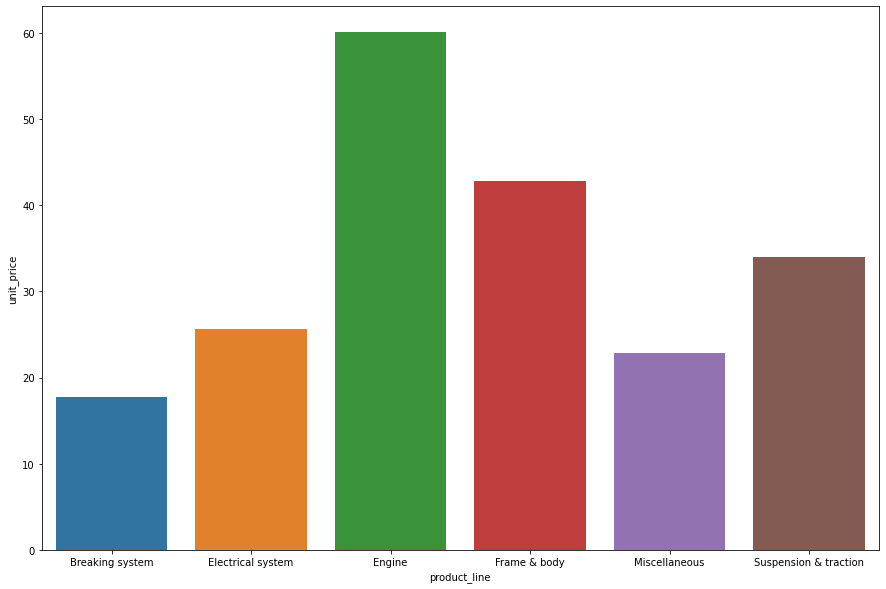

In [26]:
plt.figure(figsize=[15,10])

sns.barplot(x=price_productline.index,y=price_productline['unit_price'])

##### What are the total sales for each payment method?

###### engine has the highest average unit price for all the client type and warehouses

In [28]:
payment_total=data.groupby(data['payment'])[['total']].sum()
payment_total

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


##### the company made more sales where individuals had to pay with transfer than any other payment method

<AxesSubplot:xlabel='payment', ylabel='total'>

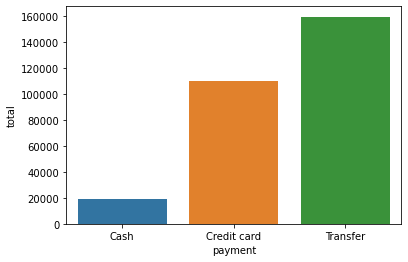

In [30]:
sns.barplot(x=payment_total.index,y=payment_total['total'])

<AxesSubplot:title={'center':'total sales for the payment ,methods'}, ylabel='payment'>

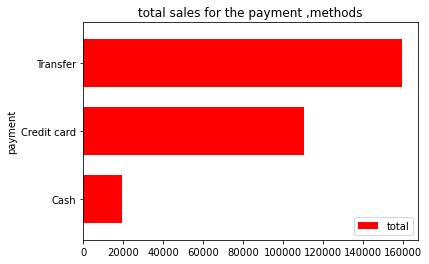

In [52]:
payment_total.plot(kind="barh",title=('total sales for the payment ,methods'),color="r",width=0.7)

##### average purchase value by client type

In [34]:
average_by_client=data.groupby("client_type")[["total"]].mean()
average_by_client

,total
client_type,
Retail,167.058929
Wholesale,709.521467


<AxesSubplot:xlabel='client_type', ylabel='total'>

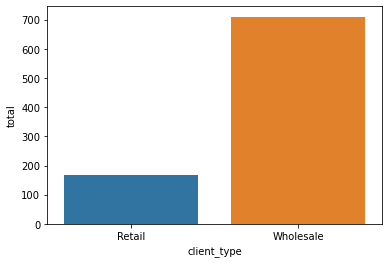

In [36]:
sns.barplot(x=average_by_client.index,y=average_by_client['total'])

##### higher average wholesale sales than retail

#####  total purchase value by product line

In [39]:
total_by_productline=data.groupby("product_line")[["total"]].sum()
total_by_productline

,total
product_line,
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


<AxesSubplot:xlabel='product_line', ylabel='total'>

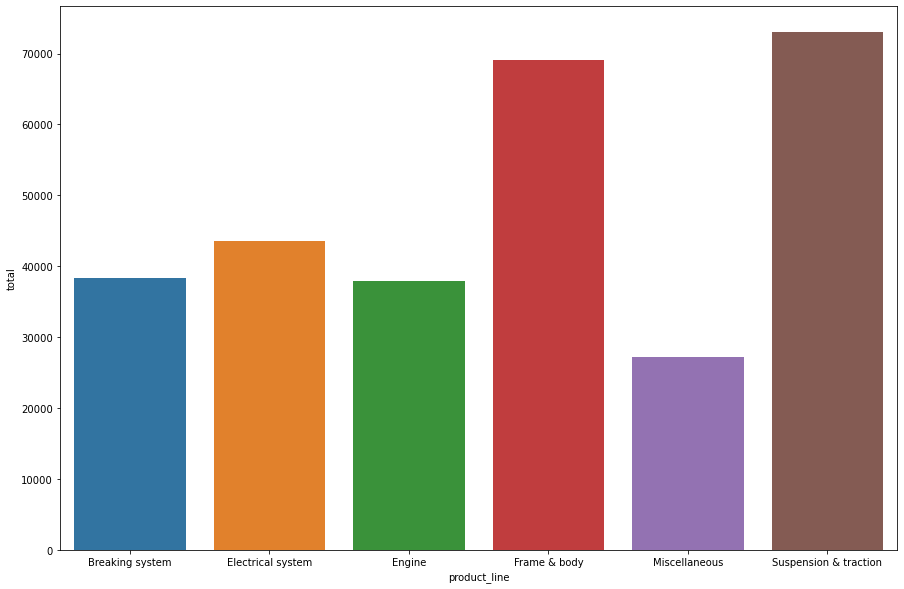

In [41]:

plt.figure(figsize=[15,10])

sns.barplot(x=total_by_productline.index,y=total_by_productline['total'])

##### suspension on traction had the highest purchase value by productline

#### in conclusion while people purchase more of the suspension and traction line, they do so by using transfer payment the most. The company client buy more in whole sale than in retail. Additionally the most expensive productline is the engine which has an average unit price of 60